In [1]:
from __future__ import division
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from glob import glob
import random
import math
import cv2

In [2]:
# Project path
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'data/')

# Get images file info
image_paths = glob(data_dir + '*/*.jpg')

labels = []
classes = []
for image in image_paths:
    data_type = image.split('/')[-2]
    if data_type == 'train':
        label = ['cat', 'dog'].index((image.split('/')[-1]).split('.')[0])
        labels.append(str(label))
        classes.append(data_type)
    elif data_type == 'test':
        labels.append('-1')
        classes.append(data_type)
# create DataFrame for images info
images_df = pd.DataFrame({
        'classes': classes,
        'label': labels,
        'full_path': image_paths
    })

In [3]:
images_df.tail()

,classes,label,full_path
37495,train,1,/home/workspace/capstone/MachineLearningProjec...
37496,train,1,/home/workspace/capstone/MachineLearningProjec...
37497,train,1,/home/workspace/capstone/MachineLearningProjec...
37498,train,0,/home/workspace/capstone/MachineLearningProjec...
37499,train,1,/home/workspace/capstone/MachineLearningProjec...


randomly read one image: 


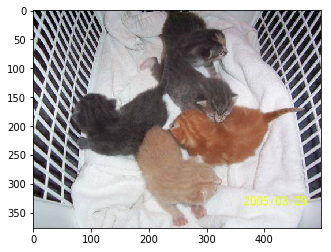

cat.8675.jpg
(377, 499, 3)


('/home/workspace/capstone/MachineLearningProjects/data/train/cat.8675.jpg',
 'cat.8675.jpg')

In [4]:
from random import choice
import matplotlib.patches as patches

# randomly read one image from images and get its category
def random_sample(images=image_paths):
    print("randomly read one image: ")
    im_file = choice(images)
    im_name = im_file.split('/')[-1]
    img = cv2.imread(im_file)
    fig, ax = plt.subplots()
    ax.imshow(img[..., -1::-1])
    plt.show()
    print(im_name)
    print(img.shape)
    return im_file, im_name

random_sample(image_paths)

In [5]:
def add_shape_to_images_df(images_df = images_df):
    widths = []
    heights = []
    ratios = []
    for index, row in images_df.iterrows():
        image_path = row['full_path']
        img = cv2.imread(image_path)
        width, height, _ = img.shape
        widths.append(width)
        heights.append(height)
        ratios.append(float(width)/float(height))
        
    images_df['width'] = widths
    images_df['height'] = heights
    images_df['ratio'] = ratios

add_shape_to_images_df(images_df)

In [6]:
images_df.head()

,classes,label,full_path,width,height,ratio
0,test,-1,/home/workspace/capstone/MachineLearningProjec...,500,402,1.243781
1,test,-1,/home/workspace/capstone/MachineLearningProjec...,399,500,0.798000
2,test,-1,/home/workspace/capstone/MachineLearningProjec...,212,199,1.065327
3,test,-1,/home/workspace/capstone/MachineLearningProjec...,375,499,0.751503
4,test,-1,/home/workspace/capstone/MachineLearningProjec...,374,500,0.748000


In [7]:
def plot_size_distribution():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2))
    ax1.plot(images_df['ratio'])
    ax1.set_title('Image size ratio')
    ax1.set_xlabel('Image index')
    ax1.set_ylabel('Ratio')
    print ('Average image ratio: ', np.mean(images_df['ratio']))
    
    ax2.plot(images_df['width'], images_df['height'], '.g')
    ax2.set_title('Image size')
    ax2.set_xlabel('Width in pixels')
    ax2.set_ylabel('Height in pixels')
    plt.show()

Average image ratio:  0.92932224996


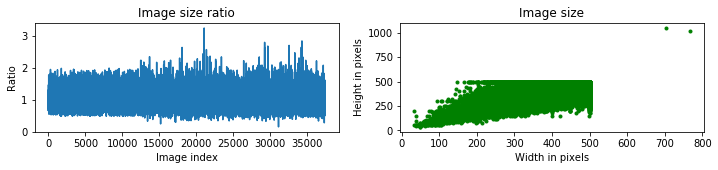

In [8]:
plot_size_distribution()

In [9]:
images_df[(images_df['height']>500) | (images_df['width']>500) ]

,classes,label,full_path,width,height,ratio
16416,train,0,/home/workspace/capstone/MachineLearningProjec...,768,1023,0.750733
21381,train,1,/home/workspace/capstone/MachineLearningProjec...,702,1050,0.668571


In [10]:
images_df[images_df['ratio']>3]

,classes,label,full_path,width,height,ratio
21109,train,1,/home/workspace/capstone/MachineLearningProjec...,499,153,3.261438


In [13]:
# Remove outliers
images_df = images_df.drop([16416, 21381, 21109]).reset_index(drop=True)

Average image ratio:  0.929271771903


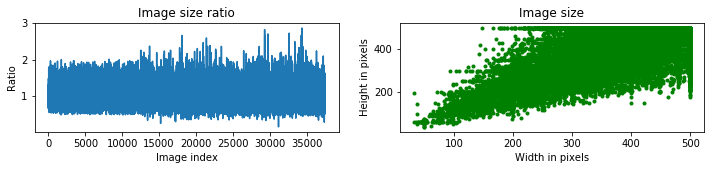

In [14]:
plot_size_distribution()

In [15]:
images_df.describe()

,width,height,ratio
count,37497.000000,37497.000000,37497.000000
mean,360.271942,404.113822,0.929272
std,96.893867,109.033069,0.275515
min,32.000000,37.000000,0.169231
25%,301.000000,325.000000,0.748000
50%,374.000000,447.000000,0.787575
75%,420.000000,499.000000,1.072941
max,500.000000,500.000000,2.857143


In [16]:
print('Total number of cats: {}'.format(len(images_df[images_df['label']=='0'])))
print('Total number of dogs: {}'.format(len(images_df[images_df['label']=='1'])))

print('Number of cats in training set: {}'.format(len(images_df[(images_df['label']=='0') & (images_df['classes']=='train')])))
print('Number of dogs in training set: {}'.format(len(images_df[(images_df['label']=='1') & (images_df['classes']=='train')])))

Total number of cats: 12499
Total number of dogs: 12498
Number of cats in training set: 12499
Number of dogs in training set: 12498


In [17]:
images_df.to_csv("images_data.csv", index=0)